<a href="https://colab.research.google.com/github/tianzhanyuan/IncompleteDiscreteChoice/blob/zhanyuan-patch-1/Ex_Panel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: Panel Discrete Choice

Consider the following model.
	\begin{align}
	    Y_{it}&=1\{X_{it}'\theta+A_i+U_{it}\ge 0\},~t=1,\dots,T
	\end{align}
  The individual-specific heterogeneity $A_i$ may be correlated with $(X_{it},U_{it})_{t=1}^T$.
  
  We work with a setting in which the analyst specifies a model for $F_{U|X}$ but is fully agnostic about how $A$ is distributed (conditional on $(X,U)$).
The model's prediction is summarized by
\begin{align}
G(u|x;\theta)=\{y=(y_1,\dots,y_T):y_{t}=1\{x_{t}'\theta+a+u_{t}\ge 0\}, \text{for some }a\in \mathbb R, \forall t\}.\
\end{align}
We work with a simple statitc model. For more general dynamic models, see the references.

 ## Model prediction
 This model provides restrictions on the probability of an individual switching from one alternative to the other. Consider $y_s=1$ and $y_t=0$. For this outcome to be consistent with $G$, there must exist $a\in\mathbb R$ such that
\begin{align}
x_{s}'\theta+a+u_{s}&\ge 0\\
x_{t}'\theta+a+u_{t}&<0.
\end{align}
These conditions hold if and only if
\begin{align}
\Delta_{st}u>-\Delta_{st}x'\theta,
\end{align}
where $\Delta_{st}z=z_s-z_t$.

Hence, the model provides a restriction on $\theta$ whenever the sequence of choices contains a switch from one alternative to the other. However, it does not provide any restrictions on the probability of an outcome if it does not involve any switching, e.g., $y=(0,\dots,0)$. This is because, without further restrictions, one can always find a low enough value of $a$ that makes $y=(0,\dots,0)$ compatible with the model.



# Analyzing the $U$-nodes ($T=3$)

The analysis above suggests that the pairwise differences $U$ determine the model's prediction. Let's consider $T=3$.

Consider the outcome $y=(0,0,1)$. For this outcome to occur, there must exist $a\in \mathbb R$ such that
\begin{align}
x_{1}'\theta+a+u_{1}&< 0\\
x_{2}'\theta+a+u_{2}&< 0\\
x_{3}'\theta+a+u_{3}&\ge 0
\end{align}
These conditions hold if and only if
\begin{align}
\Delta_{13}u&<-\Delta_{13}x'\theta \\
\Delta_{23}u&<-\Delta_{23}x'\theta.
\end{align}
Noting that $\Delta_{23}z=\Delta_{13}z-\Delta_{12}z$, we may write the latter condition as
\begin{align}
\Delta_{13}u<\Delta_{12}u-\Delta_{23}x'\theta
\end{align}
We plot this region below in the $(\Delta_{12}u,\Delta_{13}u)$ space.

<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-4038509876.py:31: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Regions in the $(\Delta_{12}u, \Delta_{13}u)$ Plane')
/tmp/ipython-input-4038509876.py:33: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta_{12}u$')
/tmp/ipython-input-4038509876.py:34: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta_{13}u$')


Text(0, 0.5, '$\\Delta_{13}u$')

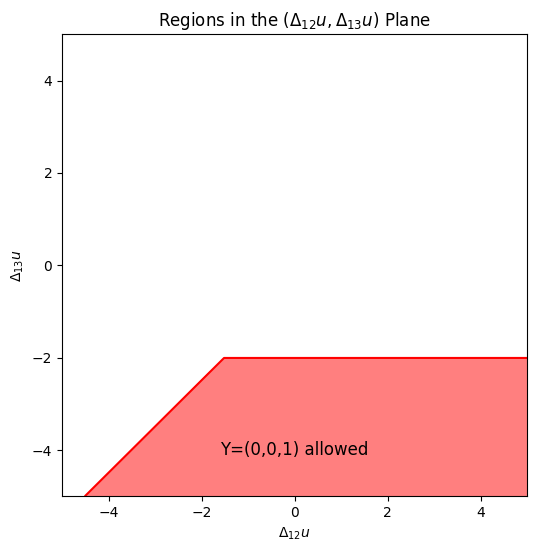

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters
delta12_x_theta = 1.5  # Replace with actual value
delta23_x_theta = 0.5  # Replace with actual value
delta13_x_theta = 2.0  # Replace with actual value

# Define the range for the plot
u_min, u_max = -5, 5
v_min, v_max = -5, 5

# Create the grid for plotting
delta12_u = np.linspace(u_min, u_max, 400)
delta13_u = np.linspace(v_min, v_max, 400)
delta12_u, delta13_u = np.meshgrid(delta12_u, delta13_u)

# Compute the regions
region001 = np.zeros(delta12_u.shape, dtype=int)
region001[(delta13_u < -delta13_x_theta) & (delta13_u < delta12_u - delta23_x_theta)] = 1

# Plot the region for (0,0,1)
plt.figure(figsize=(6, 6))
# Use plt.contour to create contour lines
# Highlight the region
contour = plt.contour(delta12_u, delta13_u, region001, levels=[0.5], colors='red')
plt.contourf(delta12_u, delta13_u, region001, levels=[0.5, 1], colors=['red'], alpha=0.5)

# Remove the background
plt.gca().patch.set_color('white')
plt.title('Regions in the $(\Delta_{12}u, \Delta_{13}u)$ Plane')
plt.text(0,-4, 'Y=(0,0,1) allowed', fontsize=12, ha='center', va='center')
plt.xlabel('$\Delta_{12}u$')
plt.ylabel('$\Delta_{13}u$')

We can repeat this exercise to determine all the U-nodes, which leads to
the following prediction:
\begin{align*}
	G(u|x;\theta)=\begin{cases}
		\{y_0,y_1,(0,0,1),(0,1,1)\} & \text{ if }\Delta_{12}u<-\Delta_{12}x'\theta,~\Delta_{13}u<\Delta_{12}u-\Delta_{23}x'\theta\\
		\{y_0,y_1,(0,0,1),(1,0,1)\} & \text{ if }\Delta_{12}u>-\Delta_{12}x'\theta,~\Delta_{13}u<-\Delta_{13}x'\theta\\
		\{y_0,y_1,(1,0,0),(1,0,1)\} & \text{ if }\Delta_{13}u>-\Delta_{13}x'\theta,~\Delta_{13}u<\Delta_{12}u-\Delta_{23}x'\theta\\
		\{y_0,y_1,(1,0,0),(1,1,0)\} & \text{ if }\Delta_{12}u>-\Delta_{12}x'\theta,~\Delta_{13}u>\Delta_{12}u-\Delta_{23}x'\theta\\
		\{y_0,y_1,(0,1,0),(1,1,0)\} & \text{ if }\Delta_{12}u<-\Delta_{12}x'\theta,~\Delta_{13}u>-\Delta_{13}x'\theta\\
		\{y_0,y_1,(0,1,0),(0,1,1)\} & \text{ if }\Delta_{13}u<-\Delta_{13}x'\theta,~\Delta_{13}u>\Delta_{12}u-\Delta_{23}x'\theta,
	\end{cases}
\end{align*}
where $y_0=(0,0,0)$ and $y_1=(1,1,1)$. So, the $U$-nodes consist of six regions $\{a,b,c,d,e,f\}$ plotted below.

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-3227566097.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Regions in the $(\Delta_{12}u, \Delta_{13}u)$ Plane')
/tmp/ipython-input-3227566097.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta_{12}u$')
/tmp/ipython-input-3227566097.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta_{13}u$')


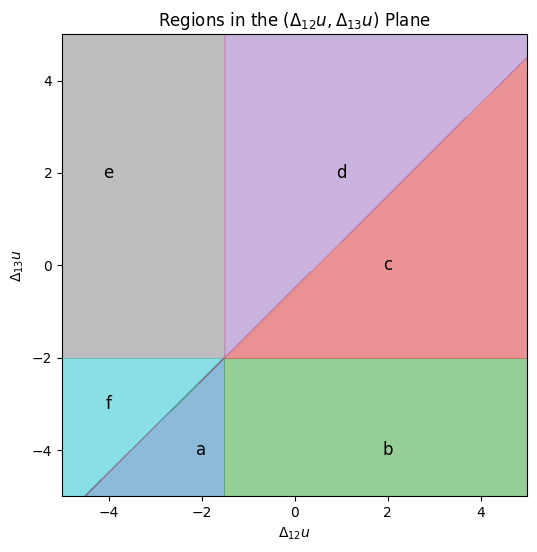

In [2]:
# Define regions based on the conditions
regions = np.zeros(delta12_u.shape, dtype=int)
regions[(delta12_u < -delta12_x_theta) & (delta13_u < delta12_u - delta23_x_theta)] = 1
regions[(delta12_u > -delta12_x_theta) & (delta13_u < -delta13_x_theta)] = 2
regions[(delta13_u > -delta13_x_theta) & (delta13_u < delta12_u - delta23_x_theta)] = 3
regions[(delta12_u > -delta12_x_theta) & (delta13_u > delta12_u - delta23_x_theta)] = 4
regions[(delta12_u < -delta12_x_theta) & (delta13_u > -delta13_x_theta)] = 5
regions[(delta13_u < -delta13_x_theta) & (delta13_u > delta12_u - delta23_x_theta)] = 6

# Plot the regions
plt.figure(figsize=(6, 6))
plt.contourf(delta12_u, delta13_u, regions, levels=6, alpha=0.5, cmap='tab10')
plt.title('Regions in the $(\Delta_{12}u, \Delta_{13}u)$ Plane')
plt.xlabel('$\Delta_{12}u$')
plt.ylabel('$\Delta_{13}u$')

# Add labels to the regions
region_labels = ['a', 'b', 'c', 'd', 'e', 'f']
label_positions = [
    (-2, -4),  # Region 1
    (2, -4),   # Region 2
    (2, 0),    # Region 3
    (1, 2),    # Region 4
    (-4, 2),   # Region 5
    (-4, -3)    # Region 6
]

for label, (x, y) in zip(region_labels, label_positions):
    plt.text(x, y, label, fontsize=12, ha='center', va='center')

plt.xlim(u_min, u_max)
plt.ylim(v_min, v_max)
plt.grid(False)
plt.show()


# Defining a model



Let's import the `idc` library.

In [3]:
!rm -rf IncompleteDiscreteChoice
!git clone --branch zhanyuan-patch-1 --single-branch https://github.com/tianzhanyuan/IncompleteDiscreteChoice.git
!pip install scikit-optimize

Cloning into 'IncompleteDiscreteChoice'...
remote: Enumerating objects: 427, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 427 (delta 90), reused 57 (delta 36), pack-reused 264 (from 1)
Receiving objects: 100% (427/427), 1.60 MiB | 6.71 MiB/s, done.
Resolving deltas: 100% (233/233), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


We define a model using the `BipartiteGraph` class in the `idc` library.

In [4]:
import IncompleteDiscreteChoice.idclib_undi as idc

# Define the Y-nodes and U-nodes
Y_nodes = [
    (0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0),
    (0, 1, 1), (1, 0, 1), (1, 1, 0), (1, 1, 1)
]
U_nodes = ['a', 'b', 'c', 'd', 'e', 'f']


# Add directed edges from every U-node to (0, 0, 0) and (1, 1, 1)
edges = [(u, (0, 0, 0)) for u in U_nodes] + [(u, (1, 1, 1)) for u in U_nodes]
# Add other directed edges
edges += [
    ('a', (0, 0, 1)), ('a', (0, 1, 1)),
    ('b', (0, 0, 1)), ('b', (1, 0, 1)),
    ('c', (1, 0, 0)), ('c', (1, 0, 1)),
    ('d', (1, 0, 0)), ('d', (1, 1, 0)),
    ('e', (0, 1, 0)), ('e', (1, 1, 0)),
    ('f', (0, 1, 0)), ('f', (0, 1, 1))
]

# Define the model
gmodel = idc.BipartiteGraph(Y_nodes, U_nodes, edges)

Let's plot the graph of the model.


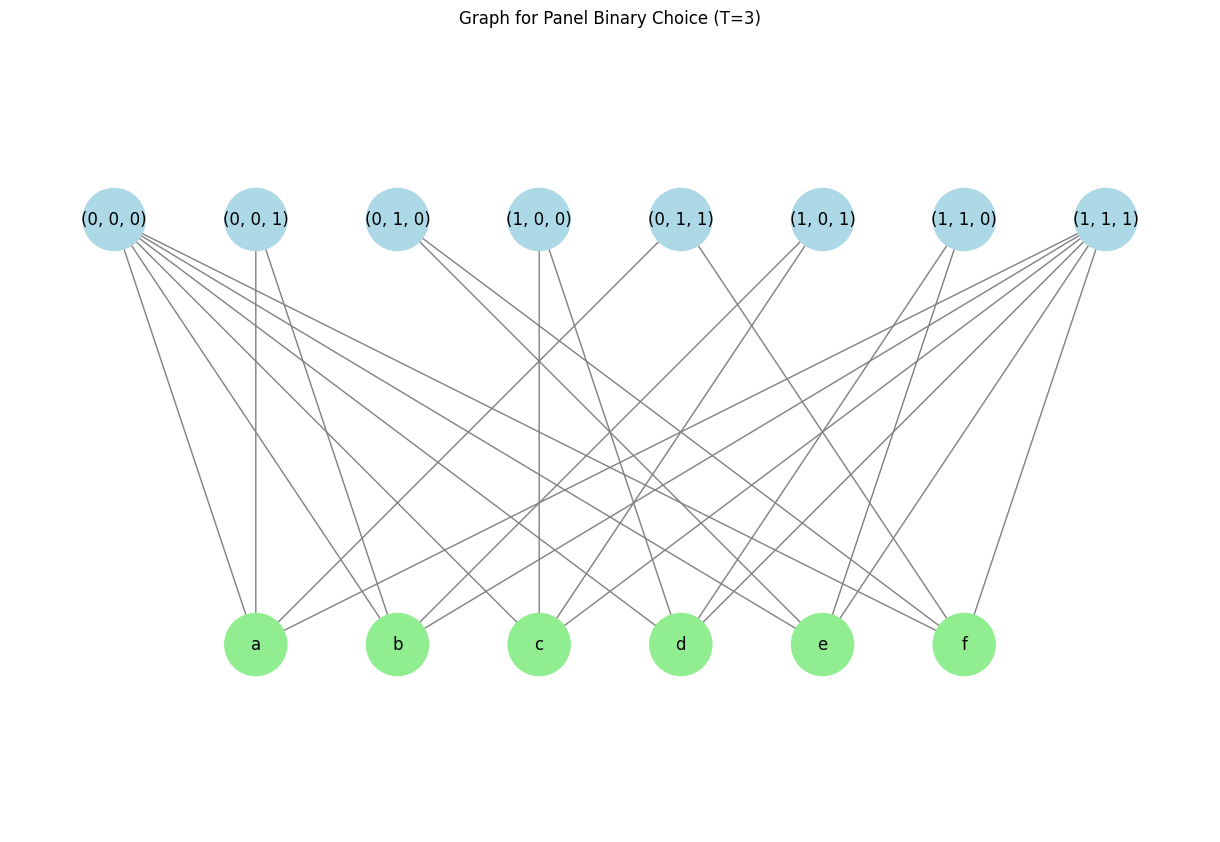

In [5]:
# Define positions for the nodes
pos = {
    (0, 0, 0): (-6, 3), (0, 0, 1): (-4, 3), (0, 1, 0): (-2, 3), (1, 0, 0): (0, 3),
    (0, 1, 1): (2, 3), (1, 0, 1): (4, 3), (1, 1, 0): (6, 3), (1, 1, 1): (8, 3),
    'a': (-4, -3), 'b': (-2, -3), 'c': (0, -3), 'd': (2, -3), 'e': (4, -3), 'f': (6, -3)
}


# Plot the graph
gmodel.plot_graph(pos, title='Graph for Panel Binary Choice (T=3)')

Now let's derive sharp bounds. For the moment, we cook up a probability distribution over the $U$-nodes.

In [6]:
import numpy as np

# Define probabilities for the U-nodes
Ftheta = np.array([0.1, 0.2, 0.3, 0.15, 0.15, 0.1])  # Example probabilities corresponding to U_nodes

# Use the calculate_sharp_lower_bound to calculate probabilities.
results,sharp_lower_bounds = gmodel.calculate_sharp_lower_bound(Ftheta)

# Show results
idc.print_table(results)


Subset of Y-nodes                                                                            Exclusive U-nodes                  Sharp Lower Bound  
{(0, 0, 0), (0, 0, 1), (1, 1, 1), (0, 1, 1)}                                                 {'a'}                              0.100              
{(0, 0, 0), (0, 0, 1), (1, 1, 1), (1, 0, 1)}                                                 {'b'}                              0.200              
{(0, 0, 0), (1, 1, 1), (0, 1, 0), (0, 1, 1)}                                                 {'f'}                              0.100              
{(0, 0, 0), (1, 1, 0), (1, 1, 1), (0, 1, 0)}                                                 {'e'}                              0.150              
{(1, 0, 0), (0, 0, 0), (1, 0, 1), (1, 1, 1)}                                                 {'c'}                              0.300              
{(1, 0, 0), (0, 0, 0), (1, 1, 0), (1, 1, 1)}                                                 {'d'}              

# Compute $F_\theta$
Above, we picked an arbitrary assignment of probabilities across the $U$-nodes. Let's write a function that calculates such probability assignments as a function of $X$ and $\theta$. For this, we assume $(U_1,U_2,U_3)\sim N(0,I_3)$, which implies $(\Delta_{12}U,\Delta_{13})\sim N(0,\Sigma)$, where $\Sigma=\begin{bmatrix} 1 &2 \\ 2& 1\end{bmatrix}.$ The function `calculate_Ftheta_panel` imported from the `idcex` library calculates the probabilities over the $U$-nodes using Monte Carlo integration.


In [7]:
import IncompleteDiscreteChoice.examples as ex
# Example usage
X = [1,   0.5 , 1,  -0.5,  1,  -0.5]  # example values for X1, X2, X3
theta = np.array([0.5, 1.0])  # example values for theta1, theta2
Ftheta = ex.calculate_Ftheta_panel(X, theta)
print("Probabilities:", Ftheta)

Probabilities: [0.0546 0.1277 0.3132 0.3139 0.1294 0.0612]


If you are interested in how it computes $F_\theta$, execute the following codes to see the source code.

In [8]:
import inspect
print(inspect.getsource(ex.calculate_Ftheta_panel))

def calculate_Ftheta_panel(X, theta, num_samples=10000, random_seed=123):
    np.random.seed(random_seed)

    T = 3
    d = len(theta)  # Dimensionality of theta (should be 2 in this case)

    # Extract X values
    X1 = X[0:2]
    X2 = X[2:4]
    X3 = X[4:6]

    # Calculate the dot products
    x1theta = np.dot(X1, theta)
    x2theta = np.dot(X2, theta)
    x3theta = np.dot(X3, theta)

    # Calculate thresholds
    delta12_x_theta = x1theta - x2theta
    delta13_x_theta = x1theta - x3theta
    delta23_x_theta = x2theta - x3theta

    # Define the mean and covariance matrix for the bivariate normal distribution
    mean = [0, 0]
    cov = [[2, 1], [1, 2]]  # Covariance matrix for (D12U, D13U)

    # Sample points using NumPy multivariate normal
    samples = np.random.multivariate_normal(mean, cov, size=num_samples)

    # Calculate probabilities for each region using Numba
    probabilities = calculate_probabilities(samples, delta12_x_theta, delta13_x_theta, delta23_x_theta)

    

Let's compute $F_\theta$ and use it to compute the sharp lower bounds.

In [9]:
# Use the calculate_sharp_lower_bound to calculate probabilities.
results,sharp_lower_bounds = gmodel.calculate_sharp_lower_bound(Ftheta)

# Show results
idc.print_table(results)

Subset of Y-nodes                                                                            Exclusive U-nodes                  Sharp Lower Bound  
{(0, 0, 0), (0, 0, 1), (1, 1, 1), (0, 1, 1)}                                                 {'a'}                              0.055              
{(0, 0, 0), (0, 0, 1), (1, 1, 1), (1, 0, 1)}                                                 {'b'}                              0.128              
{(0, 0, 0), (1, 1, 1), (0, 1, 0), (0, 1, 1)}                                                 {'f'}                              0.061              
{(0, 0, 0), (1, 1, 0), (1, 1, 1), (0, 1, 0)}                                                 {'e'}                              0.129              
{(1, 0, 0), (0, 0, 0), (1, 0, 1), (1, 1, 1)}                                                 {'c'}                              0.313              
{(1, 0, 0), (0, 0, 0), (1, 1, 0), (1, 1, 1)}                                                 {'d'}              

# References
- Chesher, Andrew, Adam M. Rosen, and Yuanqi Zhang. "Robust analysis of short panels." arXiv preprint [arXiv:2401.06611](https://arxiv.org/abs/2401.06611) (2024).
- Honoré, B.E. and Tamer, E. (2006), "Bounds on Parameters in Panel Dynamic Discrete Choice Models." _Econometrica_, 74: 611-629. https://doi.org/10.1111/j.1468-0262.2006.00676.x